In [152]:
print("hello world")

hello world


In [153]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [154]:
# Load images into numpy array
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray


#Business Understanding
This data is a collection of different weather types (dew,fog,frost,etc )
The data was initially collected to be implemented as a weather classifier
The predication task is going to be to predict current weather in an area, this is an important classification because it can easily create real time weather alerts for drivers and other interested parties. The model should be around 80% accurate to actually be helpful



In [155]:
import imageio
import glob
# Load images into numpy array
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

image_dir = "./images/"
files = glob.glob(image_dir + "dew/*.jpg", recursive=True)
images = []
npImgs = []
pca_images = []
rpca_images = []
n_components = 300
h=100
w=100
# Place in numpy array with labels from foldernames
for f1 in files:
    # set target as parent directory
    target = f1.split("/")[-2]
    # read image
    img = io.imread(f1,as_gray=True)
    # convert to grayscale
    
    # resize image
    img = resize(img, (h, w))
    # set colors
    #img = rgb2gray(img)
    # append to images list
    images.append(img)
    
    # create numpy array from image
    imgnum = np.array(img)
    

    #flatten to 1-D
    #print(imgnum.flatten())
    imgFlat = imgnum.flatten()
    #print(imgFlat.shape)
    #break
    #print(imgnum.shape)
    npImgs.append(imgFlat)
    
    
npImgs = np.array(npImgs)
print(npImgs.shape)
    
    
    
#linearize using PCA
pca = PCA(n_components = n_components)
#print(npImgs)
pca.fit(npImgs.copy())
X_pca = pca.transform(npImgs)
#pca_images.append((pca_img,target))
 

#linearize using RPCA

rpca = PCA(n_components=n_components, svd_solver='randomized')
#print(npImgs)
rpca.fit(npImgs.copy())
X_rpca = rpca.transform(npImgs)

#print(len(images)," ",len(images[0][0]))
print(images)

(698, 10000)
[array([[0.30780944, 0.32063586, 0.32711321, ..., 0.24073083, 0.14164963,
        0.08489168],
       [0.32477243, 0.33407264, 0.35514043, ..., 0.23764556, 0.13425872,
        0.08106484],
       [0.33602989, 0.3343044 , 0.37406653, ..., 0.23651943, 0.12626209,
        0.07649262],
       ...,
       [0.40367674, 0.41216345, 0.37390995, ..., 0.41947622, 0.34286714,
        0.26037292],
       [0.3994064 , 0.41126919, 0.40410865, ..., 0.41744448, 0.32986196,
        0.21414746],
       [0.39208469, 0.40472479, 0.38422759, ..., 0.42701169, 0.32010575,
        0.16970897]]), array([[1.        , 1.        , 1.        , ..., 0.60973946, 0.65786173,
        0.69971708],
       [1.        , 1.        , 1.        , ..., 0.59443859, 0.66045238,
        0.69493754],
       [1.        , 1.        , 1.        , ..., 0.58836096, 0.68298868,
        0.69954981],
       ...,
       [0.08803666, 0.1031357 , 0.10610435, ..., 0.3652218 , 0.37380458,
        0.38607937],
       [0.07985683, 

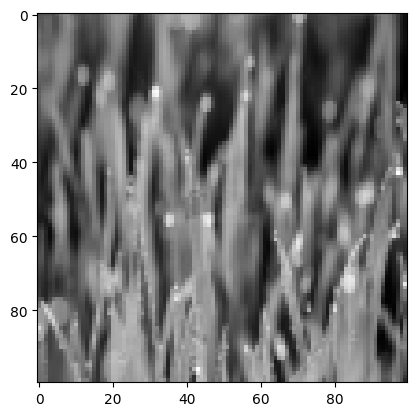

[[[0.30780944 0.32063586 0.32711321 ... 0.24073083 0.14164963 0.08489168]
  [0.32477243 0.33407264 0.35514043 ... 0.23764556 0.13425872 0.08106484]
  [0.33602989 0.3343044  0.37406653 ... 0.23651943 0.12626209 0.07649262]
  ...
  [0.40367674 0.41216345 0.37390995 ... 0.41947622 0.34286714 0.26037292]
  [0.3994064  0.41126919 0.40410865 ... 0.41744448 0.32986196 0.21414746]
  [0.39208469 0.40472479 0.38422759 ... 0.42701169 0.32010575 0.16970897]]

 [[1.         1.         1.         ... 0.60973946 0.65786173 0.69971708]
  [1.         1.         1.         ... 0.59443859 0.66045238 0.69493754]
  [1.         1.         1.         ... 0.58836096 0.68298868 0.69954981]
  ...
  [0.08803666 0.1031357  0.10610435 ... 0.3652218  0.37380458 0.38607937]
  [0.07985683 0.09286169 0.11919559 ... 0.34799728 0.36013584 0.37263448]
  [0.07655013 0.08462171 0.12529802 ... 0.33162406 0.34842347 0.36118548]]

 [[0.29756808 0.31487552 0.31888588 ... 0.38065834 0.46368505 0.52699836]
  [0.30083606 0.312868

ValueError: X has 300 features, but PCA is expecting 10000 features as input.

In [162]:
# Create numpy array for images and labels
    
# Show first image with fixed colors

#images contains 2 elems per item, [0] is the image [1] is the folder it elongs in
#[0][0] grabs first img and actual image
#[0][1] grabs first img and folder name
#[1][0] grabs the second img in the list and grabs actual img
plt.imshow(images[0],cmap="gray")
plt.show()



    
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image


def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
 


#print(pca_images[0].shape)
#print(rpca_images[0].shape)
print(images)
images = np.array(images)
#elem,h,w = images.shape


eigenBuilds = pca.components_.reshape((n_components, h, w))
eigenBuildsR = rpca.components_.reshape((n_components, h, w))

#reconstruction of pca
idx_to_reconstruct = 1    
X_idx = X_pca[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

#reconstruction of rpca 
X_idxR = rpca[idx_to_reconstruct]
low_dimensional_representation, R_reconstructed_image = reconstruct_image(rpca,X_idxR.reshape(1, -1))




plt.subplot(1,3,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,3,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.imshow(R_reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Randomized PCA')
plt.grid(False)


"""
for i in range(0,12):
    plt.imshow(eigenBuilds[i],cmap="gray")
    plt.show()
#plt.imshow(eigenBuilds[0],cmap="gray")
#plt.show()

plt.imshow(eigenBuilds[0],cmap="gray")
plt.show()

"""